<a href="https://colab.research.google.com/github/bhartikapoor9634/Computer_Vision_Projects/blob/main/Pneumonia_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dataset**

In [ ]:
import os
import zipfile
os.environ['KAGGLE_CONFIG_DIR']="/content/"

!kaggle datasets download pcbreviglieri/pneumonia-xray-images

 99% 1.13G/1.14G [00:32<00:00, 47.1MB/s]
100% 1.14G/1.14G [00:32<00:00, 37.6MB/s]


In [ ]:
! unzip "pneumonia-xray-images.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: train/normal/IM-0435-0001-0001.jpeg  
  inflating: train/normal/IM-0435-0001.jpeg  
  inflating: train/normal/IM-0437-0001-0001.jpeg  
  inflating: train/normal/IM-0437-0001-0002.jpeg  
  inflating: train/normal/IM-0437-0001.jpeg  
  inflating: train/normal/IM-0438-0001.jpeg  
  inflating: train/normal/IM-0439-0001-0001.jpeg  
  inflating: train/normal/IM-0439-0001-0002.jpeg  
  inflating: train/normal/IM-0439-0001.jpeg  
  inflating: train/normal/IM-0440-0001.jpeg  
  inflating: train/normal/IM-0441-0001.jpeg  
  inflating: train/normal/IM-0442-0001.jpeg  
  inflating: train/normal/IM-0444-0001.jpeg  
  inflating: train/normal/IM-0445-0001.jpeg  
  inflating: train/normal/IM-0446-0001.jpeg  
  inflating: train/normal/IM-0447-0001.jpeg  
  inflating: train/normal/IM-0448-0001.jpeg  
  inflating: train/normal/IM-0449-0001.jpeg  
  inflating: train/normal/IM-0450-0001.jpeg  
  inflating: train/normal/IM-0451-0001.jpeg  
  in

# **Image Preprocessing**

In [ ]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19

In [ ]:
#Preparing training set
training_set = tf.keras.utils.image_dataset_from_directory('/content/train', image_size = (64, 64), batch_size = 32,labels='inferred',
    label_mode='categorical')

testing_set = tf.keras.utils.image_dataset_from_directory('/content/test', image_size = (64, 64), batch_size = 32, labels='inferred',
    label_mode='categorical')

Found 4192 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


# **CNN Model**

In [ ]:
mdl_cnn = tf.keras.models.Sequential()
mdl_cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
mdl_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

mdl_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
mdl_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

mdl_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
mdl_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

mdl_cnn.add(tf.keras.layers.Flatten())

mdl_cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
mdl_cnn.add(tf.keras.layers.Dense(units=2, activation='softmax'))

mdl_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
mdl_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
mdl_cnn_hist=mdl_cnn.fit(x = training_set, validation_data = testing_set, epochs = 10)

Epoch 1/10
131/131 [==============================] - 31s 159ms/step - loss: 2.5956 - accuracy: 0.8490 - val_loss: 0.3668 - val_accuracy: 0.8301
Epoch 2/10
131/131 [==============================] - 20s 146ms/step - loss: 0.1240 - accuracy: 0.9530 - val_loss: 0.8384 - val_accuracy: 0.7516
Epoch 3/10
131/131 [==============================] - 22s 163ms/step - loss: 0.0893 - accuracy: 0.9647 - val_loss: 1.0839 - val_accuracy: 0.7308
Epoch 4/10
131/131 [==============================] - 20s 148ms/step - loss: 0.0800 - accuracy: 0.9690 - val_loss: 0.9326 - val_accuracy: 0.7420
Epoch 5/10
131/131 [==============================] - 20s 148ms/step - loss: 0.0632 - accuracy: 0.9769 - val_loss: 1.0138 - val_accuracy: 0.7596
Epoch 6/10
131/131 [==============================] - 20s 145ms/step - loss: 0.0543 - accuracy: 0.9797 - val_loss: 1.8968 - val_accuracy: 0.6827
Epoch 7/10
131/131 [==============================] - 20s 147ms/step - loss: 0.0746 - accuracy: 0.9735 - val_loss: 1.3001 - val_ac

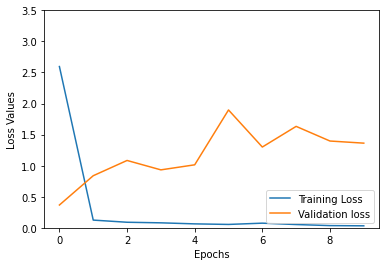

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mdl_cnn_hist.history['loss'], label='Training Loss')
plt.plot(mdl_cnn_hist.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.ylim([0, 3.5])
plt.legend(loc='lower right')
plt.show()

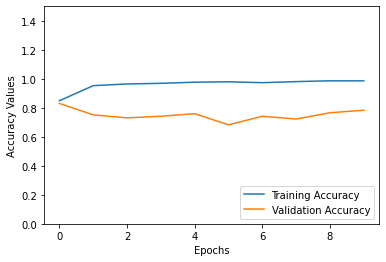

In [ ]:
plt.plot(mdl_cnn_hist.history['accuracy'], label='Training Accuracy')
plt.plot(mdl_cnn_hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Values')
plt.ylim([0, 1.5])
plt.legend(loc='lower right')
plt.show()

# **Vgg19 Model**

In [ ]:
vgg19_base_model = VGG19(include_top = False, input_shape = (64, 64, 3), weights = 'imagenet')

for lyr in vgg19_base_model.layers:
    lyr.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(vgg19_base_model.output)
pred = tf.keras.layers.Dense(2, activation='softmax')(x)

vgg19_mdl = tf.keras.models.Model(inputs = vgg19_base_model.input, outputs = pred)

vgg19_mdl.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
history_vgg19_mdl = vgg19_mdl.fit(
      training_set,
      validation_data=testing_set, 
      epochs=10)

Epoch 1/10
131/131 [==============================] - 22s 155ms/step - loss: 1.7904 - accuracy: 0.8292 - val_loss: 2.4752 - val_accuracy: 0.7692
Epoch 2/10
131/131 [==============================] - 21s 151ms/step - loss: 0.5086 - accuracy: 0.9189 - val_loss: 2.5657 - val_accuracy: 0.7660
Epoch 3/10
131/131 [==============================] - 23s 167ms/step - loss: 0.4010 - accuracy: 0.9301 - val_loss: 2.0883 - val_accuracy: 0.7997
Epoch 4/10
131/131 [==============================] - 20s 149ms/step - loss: 0.3485 - accuracy: 0.9387 - val_loss: 1.9477 - val_accuracy: 0.7981
Epoch 5/10
131/131 [==============================] - 21s 150ms/step - loss: 0.2704 - accuracy: 0.9490 - val_loss: 2.1828 - val_accuracy: 0.7724
Epoch 6/10
131/131 [==============================] - 21s 150ms/step - loss: 0.2486 - accuracy: 0.9499 - val_loss: 2.3293 - val_accuracy: 0.7580
Epoch 7/10
131/131 [==============================] - 21s 151ms/step - loss: 0.2288 - accuracy: 0.9470 - val_loss: 2.3642 - val_ac

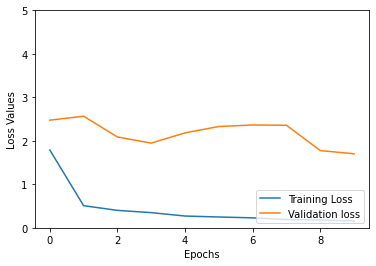

In [ ]:
plt.plot(history_vgg19_mdl.history['loss'], label='Training Loss')
plt.plot(history_vgg19_mdl.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.ylim([0, 5])
plt.legend(loc='lower right')
plt.show()

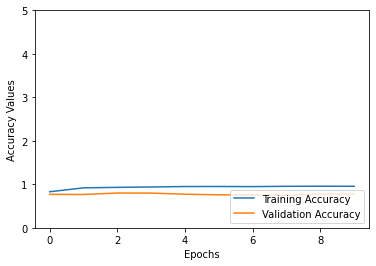

In [ ]:
plt.plot(history_vgg19_mdl.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg19_mdl.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Values')
plt.ylim([0, 5])
plt.legend(loc='lower right')
plt.show()